# Library

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn import preprocessing
from astroML.utils import completeness_contamination
from sklearn.metrics import precision_recall_curve, roc_curve
from astroML.utils import split_samples, completeness_contamination
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve#
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import itertools
import datetime
from pandas.plotting import scatter_matrix

# Load File

In [2]:
big_frame = pd.read_csv("big_frame_1.csv")
type_ID = big_frame['type_ID']
# big_frame = big_frame.drop(big_frame.loc[:,'type_ID'].head(0).columns, axis=1)
big_frame.drop('type_ID', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(big_frame,type_ID, random_state=None)
# Create standardizer
standardizer = StandardScaler()
standardizer.fit(X_train)
# Standardize features
X_std_train = standardizer.fit_transform(X_train)
X_std_test = standardizer.fit_transform(X_test)
# Standardize features
minmax = MinMaxScaler()
minmax.fit(X_train)
X_mm_train = minmax.fit_transform(X_train)
X_mm_test = minmax.fit_transform(X_test)

# Function

In [3]:
def print_score (y_test,y_pred,time1,time2):
    print("comfusion matrix = ")
    print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    
    print("")
    accuracy = accuracy_score(y_test, y_pred)
    print('accuracy_score = ', accuracy)

#In multilabel classification, 
#this function computes subset accuracy: the set of labels predicted for 
#a sample must exactly match the corresponding set of labels in y_true     
    
    print("")
    completeness, contamination = completeness_contamination(y_pred, y_test)
    print ("completeness = ", completeness)
    print ("contamination = ", contamination)
    
#completeness = true positives/true positives + false negatives,
#contamination = false positives/true positives + false positives.
#The completeness measures the fraction of total detections identified by our classifier,
#while the contamination measures the fraction of detected objects which are misclassified

# Depending on the nature of the problem and the goal of the classification,
# we may wish to optimize one or the other.
# Alternative names for these measures abound: in some fields the completeness
# and contamination are respectively referred to as the “sensitivity” and the “Type I
# error.” In astronomy, one minus the contamination is often referred to as the
# “efficiency.” In machine learning communities, the efficiency and completeness are
# respectively referred to as the “precision” and “recall.”

    print("")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print ("precision score = ", precision)
    print ("recall score = ", recall)

#precision An interesting one to look at is the accuracy of the positive pre‐ dictions; this is called the precision of the classifier 
# recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier
#precision = TP/TP + FP
#recall = TP/TP + FN
    
    print("")
    f1 = f1_score(y_test, y_pred)
    print ("F1 score = ", f1)
    
#The F1 score is the harmonic mean of precision and recall (Equation 3-3). 
#Whereas the regular mean treats all values equally, 
#the harmonic mean gives much more weight to low values.

    print("")
    print ("time span= ", time2 - time1)

In [4]:
def score (y_test,y_pred,time1,time2):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    completeness, contamination = completeness_contamination(y_pred, y_test)
    completeness = np.max(completeness)
    contamination = np.max(contamination)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    time = time2 - time1
    return(cm,accuracy,completeness,contamination,precision,recall,f1,time)

In [5]:
feature= ['Width','Height','Orientation','Eccentricity','Variance_x','Variance_y','Covariance','Intensity_x',
                     'mean_x','sigma_x','RMS_x','Intensity_y','mean_y','sigma_y','RMS_y',
                     'psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z',
                     'psfMagErr_u','psfMagErr_g','psfMagErr_r','psfMagErr_i','psfMagErr_z',
                     'cModelMag_u','cModelMag_g','cModelMag_r','cModelMag_i','cModelMag_z',
                     'cModelMagErr_u','cModelMagErr_g','cModelMagErr_r','cModelMagErr_i',
                     'cModelMagErr_z','petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z',
                     'petroMagErr_u','petroMagErr_g','petroMagErr_r','petroMagErr_i','petroMagErr_z',
                     'psf-cM_Mag_u','psf-cM_Mag_g','psf-cM_Mag_r','psf-cM_Mag_i','psf-cM_Mag_z']

# SVM_sigmoid

In [7]:
time1_svm_p_0 = datetime.datetime.now()

svm_p_0 = SVC(kernel="sigmoid", random_state=None, gamma="auto", C=1,probability=True)
model_svm_p_0 = svm_p_0.fit(X_std_train, y_train)
y_svm_p_0 = model_svm_p_0.predict(X_std_test)
y_probs_svm_p_0 = model_svm_p_0.predict_proba(X_std_test)[:, 1]
time2_svm_p_0 = datetime.datetime.now()
print_score(y_test,y_svm_p_0,time1_svm_p_0,time2_svm_p_0)

comfusion matrix = 
[[2594  320]
 [ 280 3899]]

accuracy_score =  0.9154095587198646

completeness =  0.932998324958124
contamination =  0.07584735719364778

precision score =  0.9241526428063522
recall score =  0.932998324958124

F1 score =  0.9285544177185043

time span=  0:00:30.206338


In [8]:
time1_svm_p_1 = datetime.datetime.now()

svm_p_1 = SVC(kernel="sigmoid", random_state=None, gamma="auto", C=0.1,probability=True)
model_svm_p_1 = svm_p_1.fit(X_std_train, y_train)
y_svm_p_1 = model_svm_p_1.predict(X_std_test)
y_probs_svm_p_1 = model_svm_p_1.predict_proba(X_std_test)[:, 1]
time2_svm_p_1 = datetime.datetime.now()
print_score(y_test,y_svm_p_1,time1_svm_p_1,time2_svm_p_1)

comfusion matrix = 
[[2647  267]
 [ 126 4053]]

accuracy_score =  0.9445932609615113

completeness =  0.9698492462311558
contamination =  0.06180555555555556

precision score =  0.9381944444444444
recall score =  0.9698492462311558

F1 score =  0.9537592657959759

time span=  0:00:53.857064


In [9]:
time1_svm_p_2 = datetime.datetime.now()

svm_p_2 = SVC(kernel="sigmoid", random_state=None, gamma="auto", C=0.01,probability=True)
model_svm_p_2 = svm_p_2.fit(X_std_train, y_train)
y_svm_p_2 = model_svm_p_2.predict(X_std_test)
y_probs_svm_p_2 = model_svm_p_2.predict_proba(X_std_test)[:, 1]
time2_svm_p_2 = datetime.datetime.now()
print_score(y_test,y_svm_p_2,time1_svm_p_2,time2_svm_p_2)

comfusion matrix = 
[[2490  424]
 [ 139 4040]]

accuracy_score =  0.920625969265473

completeness =  0.9667384541756401
contamination =  0.09498207885304659

precision score =  0.9050179211469535
recall score =  0.9667384541756401

F1 score =  0.9348605808168461

time span=  0:01:46.987499


In [10]:
time1_svm_p_3 = datetime.datetime.now()

svm_p_3 = SVC(kernel="sigmoid", random_state=None, gamma="auto", C=10,probability=True)
model_svm_p_3 = svm_p_3.fit(X_std_train, y_train)
y_svm_p_3 = model_svm_p_3.predict(X_std_test)
y_probs_svm_p_3 = model_svm_p_3.predict_proba(X_std_test)[:, 1]
time2_svm_p_3 = datetime.datetime.now()
print_score(y_test,y_svm_p_3,time1_svm_p_3,time2_svm_p_3)

comfusion matrix = 
[[2567  347]
 [ 328 3851]]

accuracy_score =  0.9048357535598477

completeness =  0.9215123235223738
contamination =  0.08265840876607909

precision score =  0.9173415912339209
recall score =  0.9215123235223738

F1 score =  0.9194222275277547

time span=  0:00:28.049318


In [11]:
time1_svm_p_4 = datetime.datetime.now()

svm_p_4 = SVC(kernel="sigmoid", random_state=None, gamma=0.01, C=10,probability=True)
model_svm_p_4 = svm_p_4.fit(X_std_train, y_train)
y_svm_p_4 = model_svm_p_4.predict(X_std_test)
y_probs_svm_p_4 = model_svm_p_4.predict_proba(X_std_test)[:, 1]
time2_svm_p_4 = datetime.datetime.now()
print_score(y_test,y_svm_p_4,time1_svm_p_4,time2_svm_p_4)

comfusion matrix = 
[[2613  301]
 [ 191 3988]]

accuracy_score =  0.930635838150289

completeness =  0.9542952859535774
contamination =  0.0701795290277454

precision score =  0.9298204709722546
recall score =  0.9542952859535774

F1 score =  0.9418989135569201

time span=  0:00:21.714689


In [12]:
time1_svm_p_5 = datetime.datetime.now()

svm_p_5 = SVC(kernel="sigmoid", random_state=None, gamma=0.001, C=10,probability=True)
model_svm_p_5 = svm_p_5.fit(X_std_train, y_train)
y_svm_p_5 = model_svm_p_5.predict(X_std_test)
y_probs_svm_p_5 = model_svm_p_5.predict_proba(X_std_test)[:, 1]
time2_svm_p_5 = datetime.datetime.now()
print_score(y_test,y_svm_p_5,time1_svm_p_5,time2_svm_p_5)

comfusion matrix = 
[[2816   98]
 [ 177 4002]]

accuracy_score =  0.9612293810799379

completeness =  0.9576453697056713
contamination =  0.023902439024390244

precision score =  0.9760975609756097
recall score =  0.9576453697056713

F1 score =  0.9667834279502355

time span=  0:00:33.898644


In [13]:
time1_svm_p_6 = datetime.datetime.now()

svm_p_6 = SVC(kernel="sigmoid", random_state=None, gamma=0.001, C=1,probability=True)
model_svm_p_6 = svm_p_6.fit(X_std_train, y_train)
y_svm_p_6 = model_svm_p_6.predict(X_std_test)
y_probs_svm_p_6 = model_svm_p_6.predict_proba(X_std_test)[:, 1]
time2_svm_p_6 = datetime.datetime.now()
print_score(y_test,y_svm_p_6,time1_svm_p_6,time2_svm_p_6)

comfusion matrix = 
[[2704  210]
 [  83 4096]]

accuracy_score =  0.9586916678415339

completeness =  0.9801387891840153
contamination =  0.04876915931258709

precision score =  0.9512308406874129
recall score =  0.9801387891840153

F1 score =  0.965468473777254

time span=  0:01:03.402501


In [14]:
time1_svm_p_7 = datetime.datetime.now()

svm_p_7 = SVC(kernel="sigmoid", random_state=None, gamma=0.001, C=100,probability=True)
model_svm_p_7 = svm_p_7.fit(X_std_train, y_train)
y_svm_p_7 = model_svm_p_7.predict(X_std_test)
y_probs_svm_p_7 = model_svm_p_7.predict_proba(X_std_test)[:, 1]
time2_svm_p_7 = datetime.datetime.now()
print_score(y_test,y_svm_p_7,time1_svm_p_7,time2_svm_p_7)

comfusion matrix = 
[[2688  226]
 [ 474 3705]]

accuracy_score =  0.9013111518398421

completeness =  0.886575735821967
contamination =  0.0574917323836174

precision score =  0.9425082676163826
recall score =  0.886575735821967

F1 score =  0.9136868064118373

time span=  0:00:16.968660


In [15]:
time1_svm_p_8 = datetime.datetime.now()

svm_p_8 = SVC(kernel="sigmoid", random_state=None, gamma=0.00001, C=10,probability=True)
model_svm_p_8 = svm_p_8.fit(X_std_train, y_train)
y_svm_p_8 = model_svm_p_8.predict(X_std_test)
y_probs_svm_p_8 = model_svm_p_8.predict_proba(X_std_test)[:, 1]
time2_svm_p_8 = datetime.datetime.now()
print_score(y_test,y_svm_p_8,time1_svm_p_8,time2_svm_p_8)

comfusion matrix = 
[[2360  554]
 [  84 4095]]

accuracy_score =  0.9100521641054561

completeness =  0.9798994974874372
contamination =  0.11916541191654119

precision score =  0.8808345880834588
recall score =  0.9798994974874372

F1 score =  0.9277299501585863

time span=  0:02:10.532159


In [16]:
time1_svm_p_9 = datetime.datetime.now()

svm_p_9 = SVC(kernel="sigmoid", random_state=None, gamma=0.01, C=10,class_weight="balanced",probability=True)
model_svm_p_9 = svm_p_9.fit(X_std_train, y_train)
y_svm_p_9 = model_svm_p_9.predict(X_std_test)
y_probs_svm_p_9 = model_svm_p_9.predict_proba(X_std_test)[:, 1]
time2_svm_p_9 = datetime.datetime.now()
print_score(y_test,y_svm_p_9,time1_svm_p_9,time2_svm_p_9)

comfusion matrix = 
[[2632  282]
 [ 241 3938]]

accuracy_score =  0.9262653320174821

completeness =  0.942330701124671
contamination =  0.06682464454976303

precision score =  0.933175355450237
recall score =  0.942330701124671

F1 score =  0.9377306822240743

time span=  0:00:23.944647


In [17]:
time1_svm_p_10 = datetime.datetime.now()

svm_p_10 = SVC(kernel="sigmoid", random_state=None, gamma=0.01, C=10,class_weight="balanced",probability=True)
model_svm_p_10 = svm_p_10.fit(X_train, y_train)
y_svm_p_10 = model_svm_p_10.predict(X_test)
y_probs_svm_p_10 = model_svm_p_10.predict_proba(X_std_test)[:, 1]
time2_svm_p_10 = datetime.datetime.now()
print_score(y_test,y_svm_p_10,time1_svm_p_10,time2_svm_p_10)

comfusion matrix = 
[[1384 1530]
 [3057 1122]]

accuracy_score =  0.3533060764133653

completeness =  0.2684852835606604
contamination =  0.5769230769230769

precision score =  0.4230769230769231
recall score =  0.2684852835606604

F1 score =  0.32850241545893716

time span=  0:02:47.510631


## Feature Importance

<IPython.core.display.Javascript object>


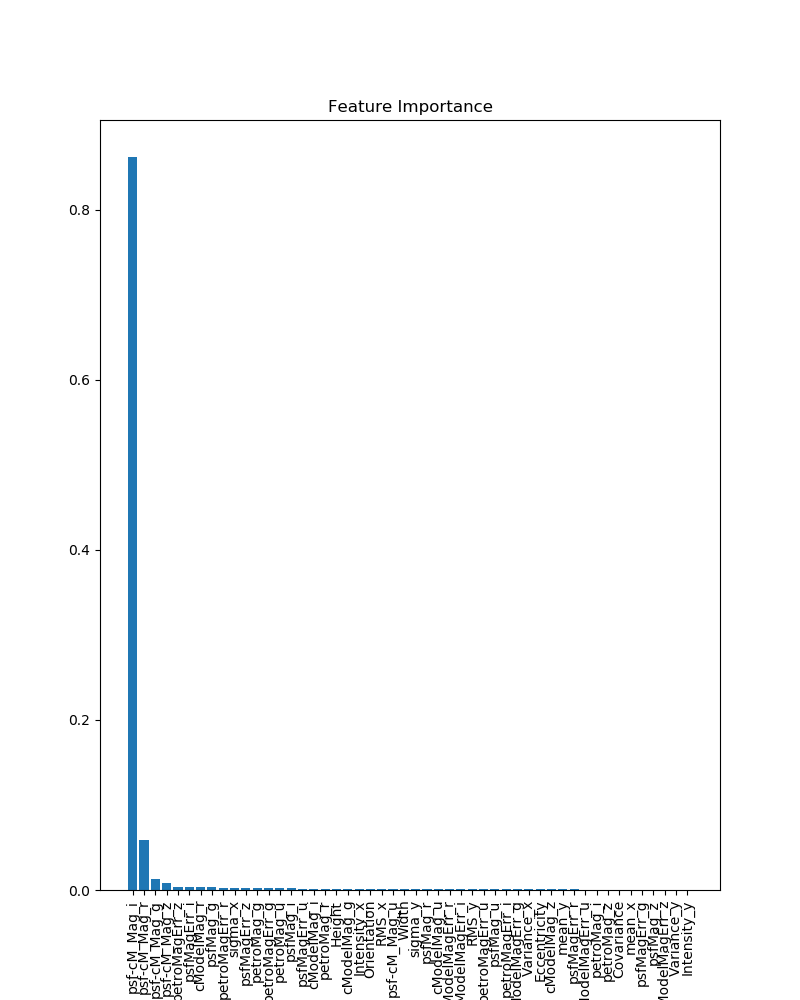

In [102]:
# Calculate feature importances
importances = tree_clf.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [feature[i] for i in indices]
# Create plot
plt.figure(figsize=(8,10))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)
# Show plot
plt.show()

### Cross-validation

In [31]:
scores = cross_val_score(tree_ent, X_train, y_train,scoring="accuracy", cv=10)
print(scores)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
scores = pd.DataFrame(scores)
display(scores)

[0.97886332 0.98027243 0.9769845  0.96991067 0.977433   0.96897038
 0.9783733  0.97320169 0.97508228 0.97273155]
Average cross-validation score: 0.98


,0
0,0.978863
1,0.980272
2,0.976984
3,0.969911
4,0.977433
5,0.968970
6,0.978373
7,0.973202
8,0.975082
9,0.972732


### Confusion Matrix

<IPython.core.display.Javascript object>


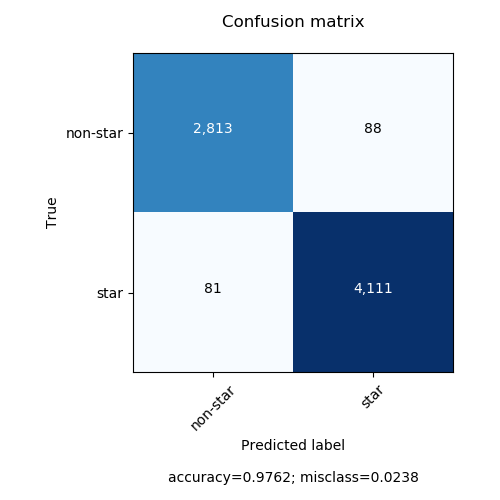

In [47]:
labels = ["non-star", "star"]
cms = confusion_matrix(y_test, y_pred_tree_ent)
accuracy = np.trace(cms) / float(np.sum(cms))
misclass = 1 - accuracy

figs = plt.figure(figsize=(5, 5))
cmap = plt.get_cmap('Blues')
plt.imshow(cms, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix\n')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels , rotation=45)
plt.yticks(tick_marks, labels)
plt.ylim(len(cms)-0.5, -0.5)
# plt.colorbar()

thresh = cms.max() / 2
for i, j in itertools.product(range(cms.shape[0]), range(cms.shape[1])):
    plt.text(j, i, "{:,}".format(cms[i, j]), horizontalalignment="center",
             color="white" if cms[i, j] > thresh else "black")

plt.xlabel('Predicted label\n\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.ylabel('True')
plt.tight_layout()
plt.show()

### Result

In [18]:
score_svm_p_0 = score(y_test,y_svm_p_0,time1_svm_p_0,time2_svm_p_0)
score_svm_p_1 = score(y_test,y_svm_p_1,time1_svm_p_1 ,time2_svm_p_1)
score_svm_p_2 = score(y_test,y_svm_p_2,time1_svm_p_2 ,time2_svm_p_2)
score_svm_p_3 = score(y_test,y_svm_p_3,time1_svm_p_3 ,time2_svm_p_3)
score_svm_p_4 = score(y_test,y_svm_p_4,time1_svm_p_4 ,time2_svm_p_4)
score_svm_p_5 = score(y_test,y_svm_p_5,time1_svm_p_5 ,time2_svm_p_5)
score_svm_p_6 = score(y_test,y_svm_p_6,time1_svm_p_6 ,time2_svm_p_6)
score_svm_p_7 = score(y_test,y_svm_p_7,time1_svm_p_7 ,time2_svm_p_7)
score_svm_p_8 = score(y_test,y_svm_p_8,time1_svm_p_8 ,time2_svm_p_8)
score_svm_p_9 = score(y_test,y_svm_p_9,time1_svm_p_9 ,time2_svm_p_9)
score_svm_p_10 = score(y_test,y_svm_p_10,time1_svm_p_10 ,time2_svm_p_10)

In [19]:
m1_t = pd.DataFrame({
 'accuracy' : [score_svm_p_0[1],score_svm_p_1[1],score_svm_p_2 [1],score_svm_p_3[1],score_svm_p_4[1],score_svm_p_5[1],score_svm_p_6[1],score_svm_p_7[1],score_svm_p_8[1],score_svm_p_9[1],score_svm_p_10[1]],
 'completeness' : [score_svm_p_0[2],score_svm_p_1[2],score_svm_p_2 [2],score_svm_p_3[2],score_svm_p_4[2],score_svm_p_5[2],score_svm_p_6[2],score_svm_p_7[2],score_svm_p_8[2],score_svm_p_9[2],score_svm_p_10[2]],
 'contamination' : [score_svm_p_0[3],score_svm_p_1[3],score_svm_p_2 [3],score_svm_p_3[3],score_svm_p_4[3],score_svm_p_5[3],score_svm_p_6[3],score_svm_p_7[3],score_svm_p_8[3],score_svm_p_9[3],score_svm_p_10[3]],
 'precision' : [score_svm_p_0[4],score_svm_p_1[4],score_svm_p_2 [4],score_svm_p_3[4],score_svm_p_4[4],score_svm_p_5[4],score_svm_p_6[4],score_svm_p_7[4],score_svm_p_8[4],score_svm_p_9[4],score_svm_p_10[4]],
 'recall' : [score_svm_p_0[5],score_svm_p_1[5],score_svm_p_2 [5],score_svm_p_3[5],score_svm_p_4[5],score_svm_p_5[5],score_svm_p_6[5],score_svm_p_7[5],score_svm_p_8[5],score_svm_p_9[5],score_svm_p_10[5]],
 'F1 score' : [score_svm_p_0[6],score_svm_p_1[6],score_svm_p_2 [6],score_svm_p_3[6],score_svm_p_4[6],score_svm_p_5[6],score_svm_p_6[6],score_svm_p_7[6],score_svm_p_8[6],score_svm_p_9[6],score_svm_p_10[6]],
 'time span' : [score_svm_p_0[7],score_svm_p_1[7],score_svm_p_2 [7],score_svm_p_3[7],score_svm_p_4[7],score_svm_p_5[7],score_svm_p_6[7],score_svm_p_7[7],score_svm_p_8[7],score_svm_p_9[7],score_svm_p_10[7]]
                })

m1_t.rename(index = {0: "score_svm_p_0", 
                     1: "score_svm_p_1",
                     2: "score_svm_p_2",
                     3: "score_svm_p_3",
                     4: "score_svm_p_4",
                     5: "score_svm_p_5",
                     6: "score_svm_p_6",
                     7: "score_svm_p_7",
                     8: "score_svm_p_8",
                     9: "score_svm_p_9",
                     10: "score_svm_p_10"
                    },inplace = True)

<IPython.core.display.Javascript object>


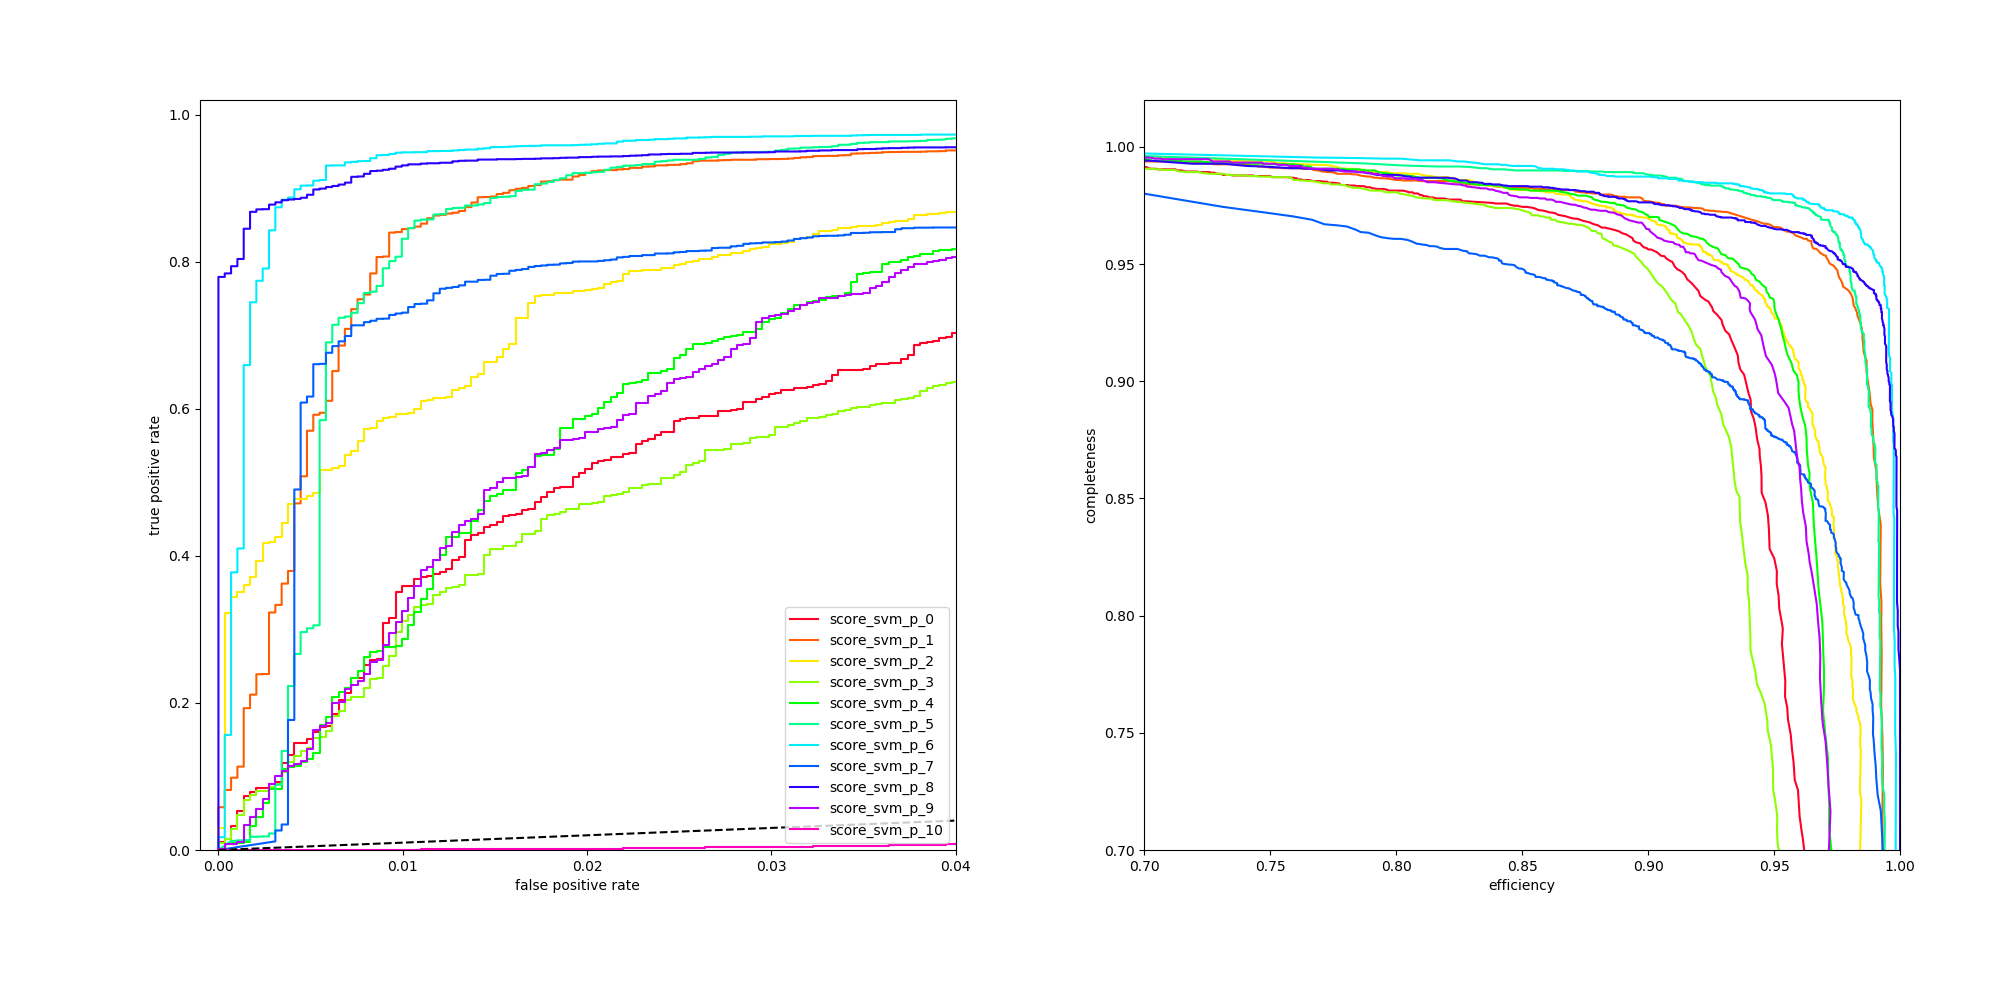

In [23]:
#------------------------------------------------------------
# Plot ROC curves and completeness/efficiency
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)

# ax2 will show roc curves
ax1 = plt.subplot(121)

# ax1 will show completeness/efficiency
ax2 = plt.subplot(122)


thresholds = np.linspace(0, 1, 1001)[:-1]

names_model = list(m1_t.index)
probs_model = [y_probs_svm_p_0,y_probs_svm_p_1,y_probs_svm_p_2,y_probs_svm_p_3,y_probs_svm_p_4,y_probs_svm_p_5,y_probs_svm_p_6,y_probs_svm_p_7,y_probs_svm_p_8,y_probs_svm_p_9,y_probs_svm_p_10]
# colors = cm.nipy_spectral(np.linspace(0, 1, len(list(m1_t.index))))
colors = cm.gist_rainbow(np.linspace(0, 1, len(names_model)))
# colors = cm.tab20(np.linspace(0, 1, len(names_model)))

for name, y_prob, c in zip(names_model, probs_model, colors):
    fpr, tpr, thresh = roc_curve(y_test, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax1.plot(fpr, tpr, label=name,color=c)

    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, y_test)
    ax2.plot(1 - cont, comp, label=name,color=c)

ax1.set_xlim(-0.001, 0.04)
ax1.set_ylim(0, 1.02)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax1.legend(loc=4)

ax2.set_xlabel('efficiency')
ax2.set_ylabel('completeness')
ax2.set_xlim(0.7, 1.0)
ax2.set_ylim(0.7, 1.02)

plt.show()